#  Test assumptions + EDA

For the EDA, I explored the most important variables and examined thier posssible relation to the prediction process.


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime 
from datetime import timedelta

__Shelter animal types__

First look at the distribution the differend kind of animals. The number of the dogs in the dataset highly outweights the number of other animals.

Text(0.5,1,'Shelter animal types')

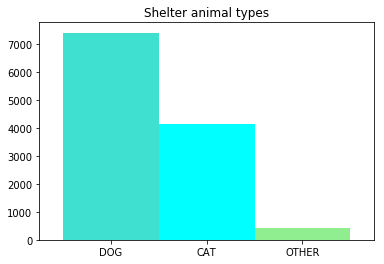

In [17]:
AnimalType = df['Type'].value_counts() 
AnimalType.plot(kind='bar',rot=0, width=1, color=['turquoise', 'aqua','lightgreen'])
plt.title('Shelter animal types')

 __Outcome types__

Then examine the distrubution of the outcome types. Furtunately the number of adoptions and the return to owner features are far the highest opposed to the other outcomes types, like euthanize or death.

Text(0.5,1,'Outcome types')

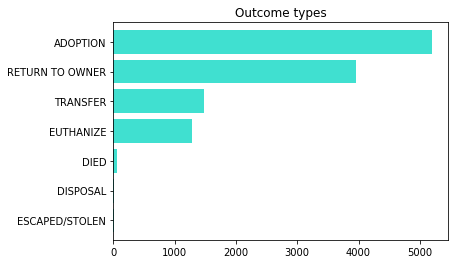

In [18]:
AnimalType = df['Outcome Type'].value_counts().sort_values() 
AnimalType.plot(kind='barh',width=0.8,rot=0, color='turquoise')
plt.title('Outcome types')

In [19]:
df = df[df['Outcome Type'] != 'ESCAPED/STOLEN']
df = df[df['Outcome Type'] != 'DISPOSAL']

__Outcomes distribution of different animals__

Text(0.5,1,'Outcomes distribution of different animals')

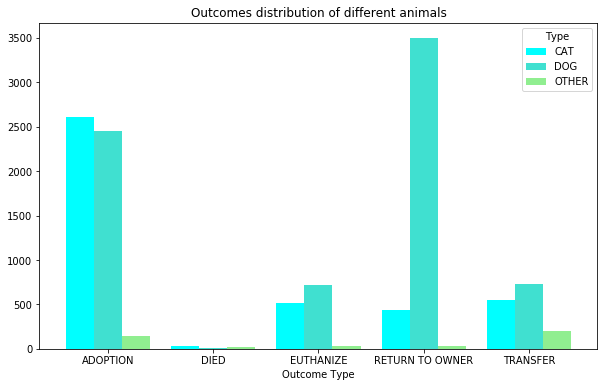

In [20]:
AnimalType = df[['Type','Outcome Type']].groupby(['Outcome Type','Type']).size().unstack()
AnimalType.plot(kind='bar',width=0.8,rot=0, figsize=(10, 6), color=['aqua','turquoise','lightgreen'])
plt.title('Outcomes distribution of different animals')

In [21]:
AnimalType = df[['Outcome Type', 'Type']].groupby(['Type', 'Outcome Type']).size().unstack()

In [22]:
AnimalType
t_total = pd.DataFrame(df['Name_given'].value_counts())
t_total
t_percent = AnimalType.join(t_total, how='outer')

In [23]:
#n_percent.reset_index(level=0, inplace=True)
t_percent.columns = ['type', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER']

In [24]:
t_percent.columns
AnimalType.sum()
t_total = pd.DataFrame(df['Type'].value_counts())
t_percent = AnimalType.join(t_total, how='outer')

In [25]:
dog = t_percent.iloc[:1,:6].div(4141)
cat = t_percent.iloc[1:2,:6].div(7412)
other = t_percent.iloc[2:3,:6].div(429)

In [26]:
t_frames = [dog, cat, other]
t_percentages = pd.concat(t_frames, axis=0)
t_percentages

,ADOPTION,DIED,EUTHANIZE,RETURN TO OWNER,TRANSFER,Type
CAT,0.629800,0.007969,0.125091,0.105289,0.131852,1.0
DOG,0.330005,0.001889,0.097545,0.471668,0.098894,1.0
OTHER,0.344988,0.048951,0.081585,0.062937,0.461538,1.0


In [27]:
t_percentages = t_percentages.drop(axis=0, columns=['Type'])

Text(0.5,1,'Outcomes distribution by name')

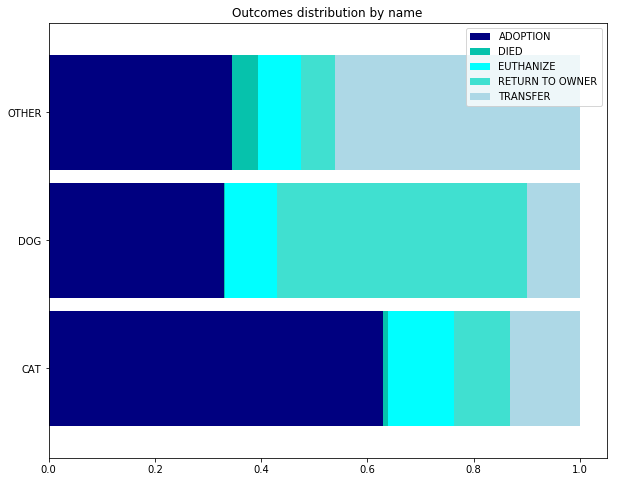

In [28]:
t_percentages.plot(kind='barh', stacked=True,  width=0.9,rot=0,color=['navy','xkcd:turquoise','aqua','turquoise', 'lightblue'], figsize=(10, 8))
plt.title('Outcomes distribution by name')

All animal types are adopted at a high rate, but cats seem to have a higher chance. Dogs are much more likely to be returned to their owners than cats. It also appears that catss are more likely to have died compared to dogs.

__Gender distribution__

Text(0.5,1,'Gender distribution')

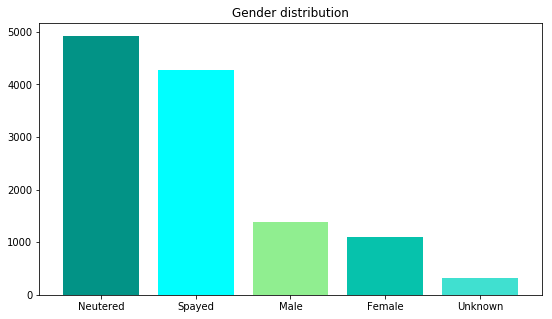

In [29]:
df.Sex.value_counts().plot(kind='bar',width=0.8,rot=0, figsize=(9, 5), color=['xkcd:teal','aqua','lightgreen', 'xkcd:turquoise','turquoise', 'azure']);
plt.title("Gender distribution")

As we can see the number of neutered and spayed animals is a lot higher.

_We need to get rid of the 'Unknown' category_
_No use of keeping it, if any influence it has on the model performance, we wouldn't be able to define the meaning of it_

In [30]:
df = df[df['Sex'] != 'Unknown']
df['Sex'].value_counts()

Neutered    4921
Spayed      4271
Male        1380
Female      1093
Name: Sex, dtype: int64

In [31]:
animal_gender = df[['Outcome Type', 'Sex']].groupby(['Sex', 'Outcome Type']).size().unstack()

In [32]:
sex_total = pd.DataFrame(df.Sex.value_counts())
sex_percent = animal_gender.join(sex_total, how='outer')
sex_percent.reset_index(level=0, inplace=True)
sex_percent.columns = ['Animal', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER',
       'Total']
sex_percent.columns

Index(['Animal', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER',
       'TRANSFER', 'Total'],
      dtype='object')

In [33]:
sex_total = pd.DataFrame(df.Sex.value_counts())
sex_percent = animal_gender.join(sex_total, how='outer')
sex_percent

,ADOPTION,DIED,EUTHANIZE,RETURN TO OWNER,TRANSFER,Sex
Female,23,19,310,487,254,1093
Male,27,17,301,756,279,1380
Neutered,2652,13,341,1494,421,4921
Spayed,2491,2,226,1216,336,4271


In [34]:
female = sex_percent.iloc[:1,:6].div(1093)
male = sex_percent.iloc[1:2,:6].div(1380)
neutered = sex_percent.iloc[2:3,:6].div(4921)
spayed = sex_percent.iloc[3:4,:6].div(4271)

In [35]:
sex_frames = [female, male, neutered, spayed]
sex_percentages = pd.concat(sex_frames, axis=0)
sex_percentages
sex_percentages = sex_percentages.drop(axis=0, columns=['Sex'])

Text(0.5,1,'Outcomes distribution by sexes')

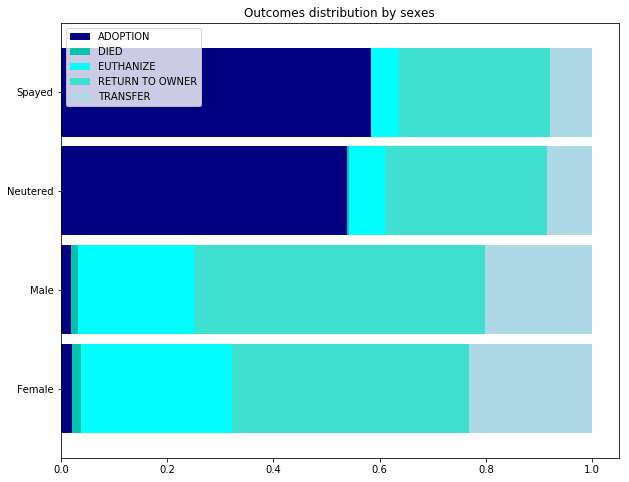

In [36]:
sex_percentages.plot(kind='barh', stacked=True,  width=0.9,rot=0,color=['navy', 'xkcd:turquoise','aqua','turquoise', 'lightblue'], figsize=(10, 8))
plt.title('Outcomes distribution by sexes')

In case of the neutered animals the chances seem higher for adoption, so that can be an important feature.

__Distribution of breeds__

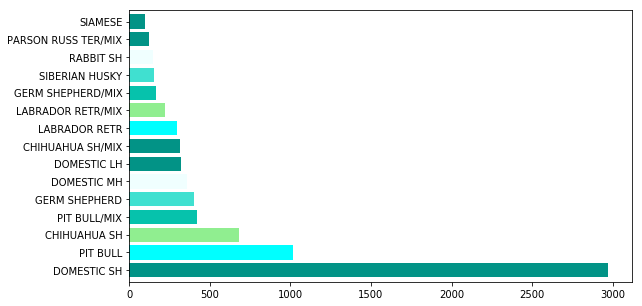

In [37]:
df['Breed'].value_counts().head(15).plot(kind='barh',width=0.8,rot=0, figsize=(9, 5), color=['xkcd:teal','aqua','lightgreen', 'xkcd:turquoise','turquoise', 'azure'])

_Simplifying breeds_

In [38]:
df['Breed'].nunique()

749

In [39]:
common_breeds = df['Breed'].value_counts().head(150)

In [40]:
def to_common_breeds(row):
    if row['Breed'] in common_breeds:
        return row['Breed']
    else:
        return 'uncommon bred'


df['Breeds'] = df.apply(to_common_breeds, axis=1)
df.filter(items=['Breed', 'Breeds']).head(5)

,Breed,Breeds
1,LABRADOR RETR,LABRADOR RETR
2,DOMESTIC SH,DOMESTIC SH
3,CHIHUAHUA SH,CHIHUAHUA SH
4,LABRADOR RETR,LABRADOR RETR
5,AUST CATTLE DOG/MIX,AUST CATTLE DOG/MIX


In [41]:
df['Breeds'].nunique()

151

In [42]:
def color_simplifier(row):
    if "/" in row['Breeds']:
        return row['Breeds'].split('/')[0] + ' mixed breed'
        return 'mixed breed'
    else:
        return row['Breeds']


df['Breed type'] = df.apply(color_simplifier, axis=1)
df.filter(items=['Breeds', 'Breed type']).head(2)

,Breeds,Breed type
1,LABRADOR RETR,LABRADOR RETR
2,DOMESTIC SH,DOMESTIC SH


In [43]:
df['Breed type'].nunique()

123

In [44]:
df_dogs = df.loc[df.Type=='DOG'].copy()

(-0.5, 1199.5, 999.5, -0.5)

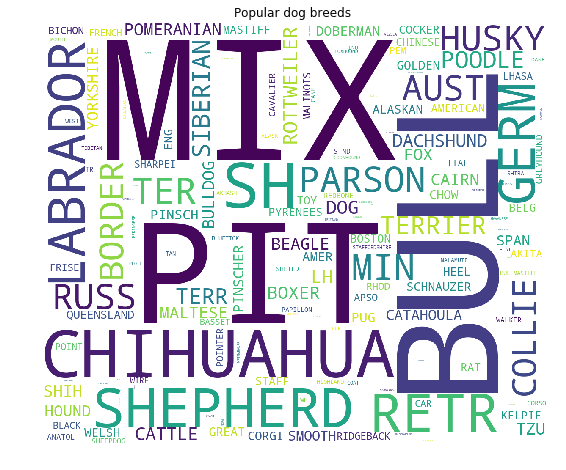

In [45]:
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize = (20, 18))
plt.subplot(2, 2, 1)

text_dog = ' '.join(df_dogs['Breed'].fillna('').values)

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Popular dog breeds')
plt.axis("off")

In [46]:
def to_wheather_mix(row):
    if "/" in row['Breed']:
        return 'mixed breed dog'
    else:
        return 'pure-bred'


df_dogs['Dog breed types'] = df_dogs.apply(to_wheather_mix, axis=1)
df_dogs.filter(items=['Breed', 'Dog breed types']).head(2)

,Breed,Dog breed types
1,LABRADOR RETR,pure-bred
3,CHIHUAHUA SH,pure-bred


Suprisingly the rate of adoption is higher in case of the mixed breed dogs. Pure-bred are dogs more likely to be returned to their owners.

__Distribution of colors__

In [47]:
df.Color.nunique()

249

In [48]:
def color_simplifier(row):
    if "/" in row['Color']:
        return row['Color'].split('/')[0] + ' mixed color'
        return 'mixed color'
    else:
        return row['Color']


df['Simple color'] = df.apply(color_simplifier, axis=1)
df.filter(items=['Color', 'Simple color']).head(3)

,Color,Simple color
1,YELLOW,YELLOW
2,CALICO,CALICO
3,BLUE/TAN,BLUE mixed color


In [49]:
df['Simple color'].nunique()

97

__Without names__

In [50]:
animal_name = df[['Outcome Type', 'Name_given']].groupby(['Name_given', 'Outcome Type']).size().unstack()

In [51]:
n_total = pd.DataFrame(df['Name_given'].value_counts())
n_percent = animal_name.join(n_total, how='outer')
n_percent.columns = ['name', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER']

In [52]:
n_total = pd.DataFrame(df['Name_given'].value_counts())
n_percent = animal_name.join(n_total, how='outer')

In [53]:
name_given = n_percent.iloc[:1,:6].div(10458)
name_not_given = n_percent.iloc[1:2,:6].div(1207)

Text(0.5,1,'Outcomes distribution by name')

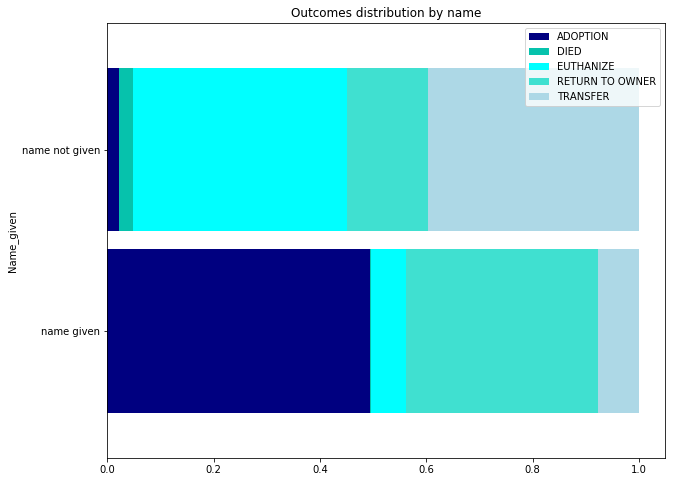

In [54]:
n_frames = [name_given, name_not_given]
n_percentages = pd.concat(n_frames, axis=0)
n_percentages = n_percentages.drop(axis=0, columns=['Name_given'])
n_percentages.plot(kind='barh', stacked=True,  width=0.9,rot=0,color=['navy','xkcd:turquoise','aqua','turquoise', 'lightblue'], figsize=(10, 8))
plt.title('Outcomes distribution by name')

The rate of adopted animals is very low when they do not have a name, while high rate of euthanize and transfer can be shown in their case.

__Time spent in shelter__

In [55]:
shelter_days = df['Days in Shelter']

def counting(shelter_days):
    in_one_day = 0
    in_one_week = 0
    in_one_month = 0
    in_three_month = 0
    more_than_three_month = 0 
    more_than_half_year = 0
    more_than_a_year = 0
    for days in shelter_days:
        if days < 2:
            in_one_day += 1
        elif days < 8:
            in_one_week += 1
        elif days < 30:
            in_one_month += 1
        elif days < 90:
            in_three_month += 1
        elif days < 180:
            more_than_three_month += 1
        elif days < 365:
            more_than_half_year += 1
        elif days > 365:
            more_than_a_year += 1
    shelter_periods = {'In one day':in_one_day, 'In one week':in_one_week, 'In one month':in_one_month, 
                       'In three month':in_three_month, 'More than three month':more_than_three_month, 
                       'More than half year':more_than_half_year, 'More than one year': more_than_a_year}
    return shelter_periods

shelter_periods = counting(shelter_days)

In [56]:
def to_periods(row):
    if row['Days in Shelter'] < 2:
        return 'in one day'
    elif row['Days in Shelter'] < 8:
        return 'in one week'
    elif row['Days in Shelter'] < 30:
        return 'in one month'
    elif row['Days in Shelter'] < 90:
        return 'in three month'
    elif row['Days in Shelter'] < 180:
        return 'more_than_three_month'
    elif row['Days in Shelter'] < 365:
        return 'more_than_half_year'
    elif row['Days in Shelter'] > 365:
        return 'more_than_a_year'


df['Periods in shelter'] = df.apply(to_periods, axis=1)
df['Periods in shelter'].unique()

array(['in one day', 'in one month', 'in three month',
       'more_than_half_year', 'in one week', 'more_than_three_month',
       'more_than_a_year'], dtype=object)

In [57]:
df_period = pd.DataFrame(list(shelter_periods.items()), columns=['Periods', 'Period lenghts'])

Text(0.5,1,'Time spent in shelter')

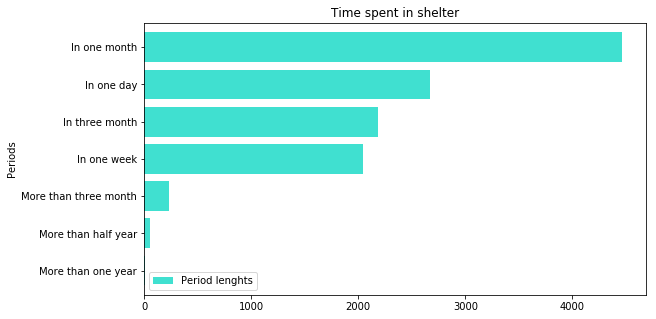

In [58]:
df_period = df_period.set_index(df_period['Periods'], drop=True, append=False, inplace=False, verify_integrity=False)
df_period = df_period.sort_values(by='Period lenghts', ascending=True) 
df_period.plot(kind='barh',width=0.8,rot=0, figsize=(9, 5), color='turquoise')
plt.title('Time spent in shelter')

As we can see, most animals spent arond one week to one month in the shleter. The least frequent for these animals is getting adopetd after a year of listing. Amimals that only spend one day in the shelter is also high. 

__Health conditions and outcomes__

Text(0.5,1,'Health condition distribution')

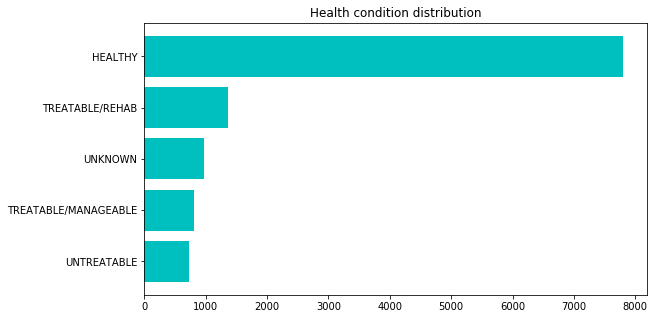

In [59]:
animal_health = df['Intake Condition'].value_counts().sort_values() 
animal_health.plot(kind='barh',width=0.8,rot=0,figsize=(9, 5), color='c')
plt.title('Health condition distribution')

In [60]:
df = df[df['Intake Condition'] != 'UNKNOWN']

In [61]:
animal_health = df[['Outcome Type', 'Intake Condition']].groupby(['Intake Condition', 'Outcome Type']).size().unstack()
h_total = pd.DataFrame(df['Intake Condition'].value_counts())
h_percent = animal_health.join(h_total, how='outer')
h_percent.reset_index(level=0, inplace=True)
h_percent.columns = ['H', 'ADOPTION', 'DIED', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER',
       'Total']
h_total = pd.DataFrame(df['Intake Condition'].value_counts())
h_percent = animal_health.join(h_total, how='outer')

Text(0.5,1,'Outcomes distribution by health condition')

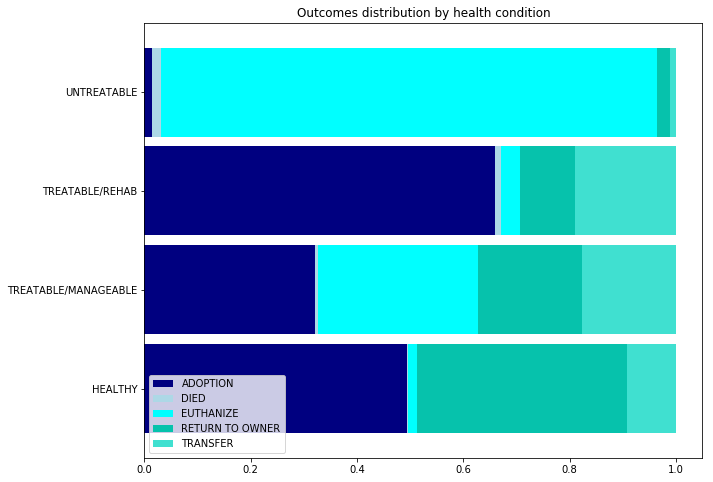

In [62]:
HEALTHY = h_percent.iloc[:1,:6].div(7797)
TREATABLE_MANAGEABLE = h_percent.iloc[1:2,:6].div(804)
TREATABLE_REHAB	 = h_percent.iloc[2:3,:6].div(1364)
UNTREATABLE = h_percent.iloc[3:4,:6].div(724)
h_frames = [HEALTHY, TREATABLE_MANAGEABLE, TREATABLE_REHAB, UNTREATABLE]
h_percentages = pd.concat(h_frames, axis=0)
h_percentages = h_percentages.drop(axis=0, columns=['Intake Condition'])
h_percentages.plot(kind='barh', stacked=True,  width=0.9,rot=0,color=['navy','lightblue','aqua','xkcd:turquoise','turquoise'], figsize=(10, 8))
plt.title('Outcomes distribution by health condition')

As we can see, most of the healty animals end up adopted or returned to the owner and only a small percentage of them died or got euthanized. In the case of threatable animals without the option of rehab the rate of the euthanization is a lot higher, around the same as the rate of the adoption.

In [63]:
df = df[df['Intake Condition'] != 'UNTREATABLE']

__Age__

In [64]:
df['Intake Date'] = pd.to_datetime(df['Intake Date'])
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])
df['Outcome Date'] = pd.to_datetime(df['Outcome Date'])

In [65]:
intake_dates = list(df['Intake Date'])
birth_dates = list(df['Date Of Birth'])
print(intake_dates[1])
print(birth_dates[1])
(intake_dates[1] - birth_dates[1]).days

2017-12-22 00:00:00
2017-10-13 00:00:00


70

In [66]:
age_tuple = zip(df['Intake Date'], df['Date Of Birth'])

ages = [(i - b).days for i, b in age_tuple]
df["Age"] = ages

In [67]:
df_age = df[df.Age > 0]

In [68]:
df_age['Periods in shelter'].unique()

array(['in one day', 'in one month', 'in three month',
       'more_than_half_year', 'in one week', 'more_than_three_month',
       'more_than_a_year'], dtype=object)

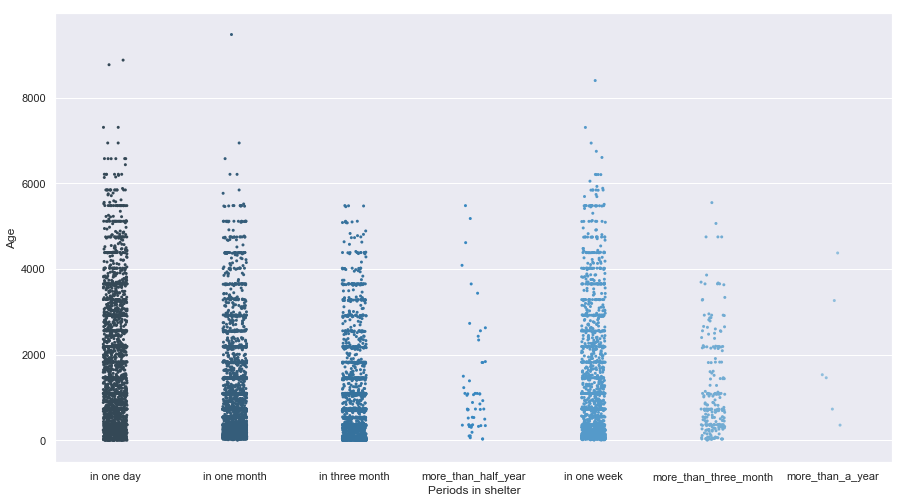

In [69]:
sns.set(rc={'figure.figsize':(15,8.27)})
ax = sns.stripplot(x="Periods in shelter", y="Age", data=df_age, size=3, palette='Blues_d')

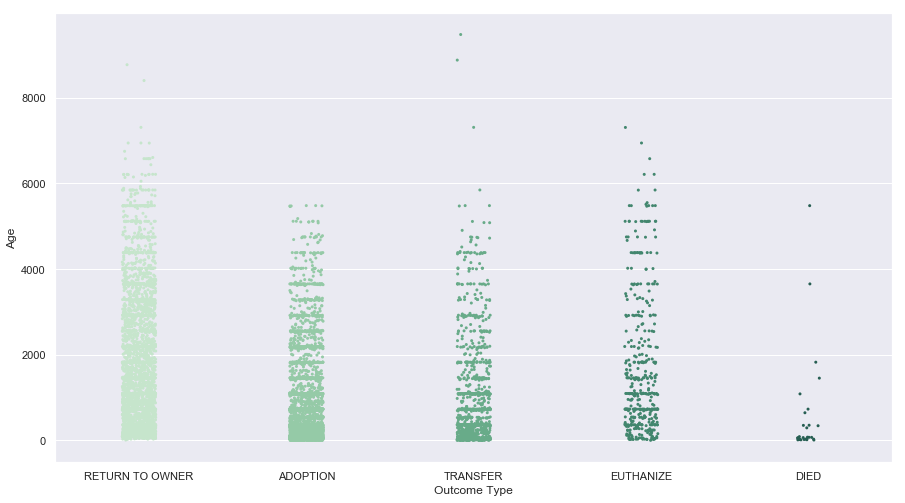

In [70]:
import seaborn as sns

ax = sns.stripplot(x="Outcome Type", y="Age", data=df_age, size=3, palette='ch:2.5,-.2,dark=.3')

__Progress report__

- Approach to exploratory data analysis

_Initial results:
I eximaned the important features as part of the EDA and reported the findings along the way._

- Next steps

_Most importantly the EDA informs us about the important/potential features. It also very usefull in determinting the aims of the classificaton._


1. _Putting together the final table of the features._
2. _Fitting a RandomForset model to predict the outcomes, fitting Decesion Tree model for comparision._
3. _Looking at more modelling options to decide for other models to establish.Optionally attempt to predict the speed of adaption._

__Questions?__


__Ideas__